In [23]:
# Dependencies
import requests
from pprint import pprint
import pandas as pd 
import matplotlib.pyplot as plt
import datetime

url = "https://api.covid19api.com/summary"

response = requests.get(url).json()
data = response['Countries']

country = []
date = []
total_cases = []
total_deaths = []
total_recovered = []

for row in data:
    country.append(row['Country'])
    date.append(row["Date"])
    total_cases.append(row['TotalConfirmed'])
    total_deaths.append(row['TotalDeaths'])
    total_recovered.append(row['TotalRecovered'])



In [4]:
covid_new_df = pd.DataFrame({
                            'Country': country,
                            'Date': date,
                            'Total Cases': total_cases,
                            'Total Deaths': total_deaths,
                            'Total Recovered': total_recovered
})
covid_new_df

,Country,Date,Total Cases,Total Deaths,Total Recovered
0,Afghanistan,2020-07-18T16:33:31Z,35229,1147,23151
1,Albania,2020-07-18T16:33:31Z,3906,107,2214
2,Algeria,2020-07-18T16:33:31Z,21948,1057,15430
3,Andorra,2020-07-18T16:33:31Z,880,52,803
4,Angola,2020-07-18T16:33:31Z,638,29,199
...,...,...,...,...,...
181,Viet Nam,2020-07-18T16:33:31Z,382,0,356
182,Western Sahara,2020-07-18T16:33:31Z,10,1,8
183,Yemen,2020-07-18T16:33:31Z,1576,440,695
184,Zambia,2020-07-18T16:33:31Z,2810,109,1450


In [8]:
url = "https://api.covid19api.com/all"

response1 = requests.get(url).json()
response1

country = []
date = []
total_cases = []
total_deaths = []
total_recovered = []

for row in response1:
    country.append(row['Country'])
    date.append(row["Date"])
    total_cases.append(row['Confirmed'])
    total_deaths.append(row['Deaths'])
    total_recovered.append(row['Recovered'])
    
country

['Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghan

In [10]:
covid_new_df1 = pd.DataFrame({
                            'Country': country,
                            'Date': date,
                            'Total Cases': total_cases,
                            'Total Deaths': total_deaths,
                            'Total Recovered': total_recovered
})
covid_new_df1.dtypes

Country            object
Date               object
Total Cases         int64
Total Deaths        int64
Total Recovered     int64
dtype: object

In [33]:
# covid_new_df1["Date"] = pd.to_datetime(covid_new_df1["Date"],format='%Y-%m-%d %H:%M:%S')
covid_new_df1["Date"] = pd.to_datetime(covid_new_df1["Date"]).apply(lambda x: x.date())
covid_new_df1

,Country,Date,Total Cases,Total Deaths,Total Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
625837,Zimbabwe,2020-07-13,1034,19,343
625838,Zimbabwe,2020-07-14,1064,20,343
625839,Zimbabwe,2020-07-15,1089,20,395
625840,Zimbabwe,2020-07-16,1362,23,425


In [34]:
grouped_data = covid_new_df1.groupby("Date").sum()
grouped_data_df = grouped_data.reset_index()
grouped_data_df.head()

,Date,Total Cases,Total Deaths,Total Recovered
0,2020-01-22,555,17,28
1,2020-01-23,655,18,30
2,2020-01-24,943,26,36
3,2020-01-25,1436,42,39
4,2020-01-26,2123,56,52


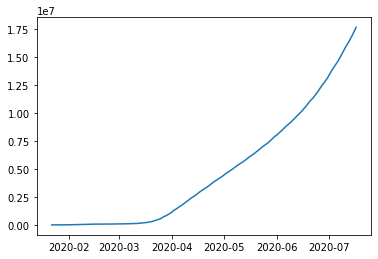

In [35]:
plt.plot(grouped_data_df["Date"],grouped_data_df["Total Cases"])
plt.show()